In [134]:
import numpy as np

from matplotlib import pyplot as plt
import networkx as nx

from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.inference import BeliefPropagation
from pgmpy.models import BayesianNetwork, MarkovModel

In [192]:
def plot_graph(G, ax, pos=None):
    if pos is None:
        pos = nx.nx_agraph.graphviz_layout(G, prog="dot")
      # graphviz layout `dot` which supports tree like structured graphs
    r = nx.draw_networkx(G,
                         ax=ax,
                         pos=pos,
                         node_shape="o",
                         node_color='white',
                         node_size=2000,
                         edgecolors='red',
                         width=2,
                         linewidths=2)


# Bayesian Graphical Models

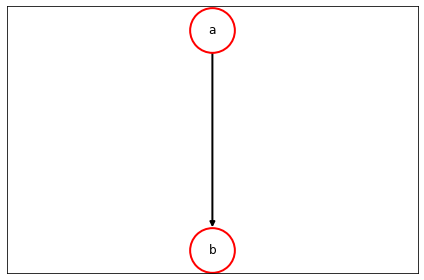

In [136]:
model = BayesianNetwork()
"""
Build the model adding nodes.
You can use `add_edges_from` function for this
"""

model.add_nodes_from(['a', 'b'])
model.add_edge('a', 'b')
plot_graph(model, ax=plt.subplot(111))
plt.tight_layout()
plt.show()

## Holmes's Lawn Example

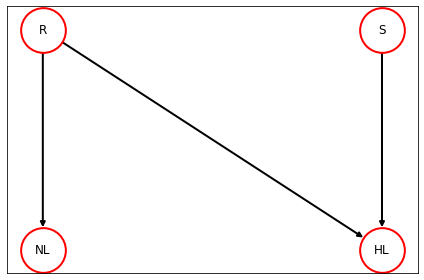

In [137]:
sl_model = BayesianNetwork()
"""
Build the model adding nodes.
You can use `add_edges_from` function for this
"""

sl_model.add_nodes_from(['R', 'S', 'NL', 'HL'])
sl_model.add_edge('R', 'NL')
sl_model.add_edge('R', 'HL')
sl_model.add_edge('S', 'HL')

plot_graph(sl_model, plt.subplot(111))
plt.tight_layout()
plt.show()

### Cloudy

In [138]:
csl_model = BayesianNetwork()
"""
Build the model adding nodes.
You can use `add_edges_from` function for this
"""

csl_model.add_nodes_from(['C', 'S', 'R', 'W'])
csl_model.add_edge('C', 'S')
csl_model.add_edge('C', 'R')
csl_model.add_edge('S', 'W')
csl_model.add_edge('R', 'W')

C = TabularCPD(variable='C',
               variable_card=2,
               values=[[0.5], [0.5]],
               state_names={'C': [False, True]})
S = TabularCPD(variable='S',
               variable_card=2,
               evidence=['C'],
               evidence_card=[2],
               values=[[0.5, 0.9], [0.5, 0.1]],
               state_names={
                   'S': [False, True],
                   'C': [False, True]
               })
R = TabularCPD(variable='R',
               variable_card=2,
               evidence=['C'],
               evidence_card=[2],
               values=[[0.8, 0.2], [0.2, 0.8]],
               state_names={
                   'R': [False, True],
                   'C': [False, True]
               })
W = TabularCPD(variable='W',
               variable_card=2,
               evidence=['R', 'S'],
               evidence_card=[2, 2],
               values=[[1.0, 0.1, 0.1, 0.01], [0.0, 0.9, 0.9, 0.99]],
               state_names={
                   'W': [False, True],
                   'R': [False, True],
                   'S': [False, True]
               })

csl_model.add_cpds(C, S, R, W)

csl_model.check_model()

True

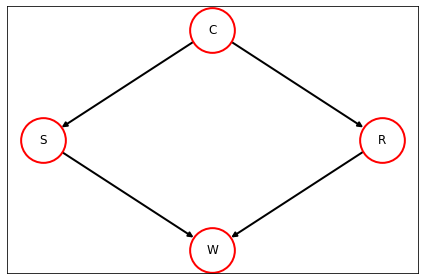

In [139]:
plot_graph(csl_model, ax=plt.subplot(111))
plt.tight_layout()
plt.show()

In [140]:
csl_belief_propagation = BeliefPropagation(csl_model)

In [141]:
print(
    csl_belief_propagation.query(variables=['W', 'S', 'R'],
                                 evidence={'C': True}))

0it [00:00, ?it/s]

+----------+----------+----------+--------------+
| R        | S        | W        |   phi(R,S,W) |
+==========+==========+==========+==============+
| R(False) | S(False) | W(False) |       0.1800 |
+----------+----------+----------+--------------+
| R(False) | S(False) | W(True)  |       0.0000 |
+----------+----------+----------+--------------+
| R(False) | S(True)  | W(False) |       0.0020 |
+----------+----------+----------+--------------+
| R(False) | S(True)  | W(True)  |       0.0180 |
+----------+----------+----------+--------------+
| R(True)  | S(False) | W(False) |       0.0720 |
+----------+----------+----------+--------------+
| R(True)  | S(False) | W(True)  |       0.6480 |
+----------+----------+----------+--------------+
| R(True)  | S(True)  | W(False) |       0.0008 |
+----------+----------+----------+--------------+
| R(True)  | S(True)  | W(True)  |       0.0792 |
+----------+----------+----------+--------------+


## Joint Probability Factorization

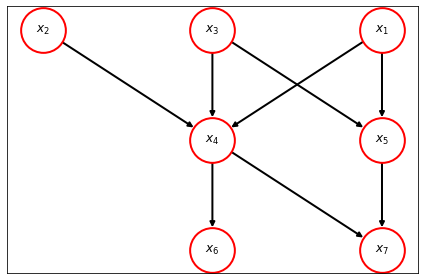

In [142]:
model = BayesianNetwork()
"""
Build the model adding nodes.
You can use `add_edges_from` function for this
"""

model.add_nodes_from(
    ['$x_1$', '$x_2$', '$x_3$', '$x_4$', '$x_5$', '$x_6$', '$x_7$'])
model.add_edge('$x_1$', '$x_4$')
model.add_edge('$x_1$', '$x_5$')
model.add_edge('$x_2$', '$x_4$')
model.add_edge('$x_3$', '$x_4$')
model.add_edge('$x_3$', '$x_5$')
model.add_edge('$x_4$', '$x_6$')
model.add_edge('$x_4$', '$x_7$')
model.add_edge('$x_5$', '$x_7$')

plot_graph(model, ax=plt.subplot(111))
plt.tight_layout()
plt.show()

\begin{equation}
p(x_1,x_2,x_3,x_4,x_5,x_6,x_7) = p(x_1)p(x_2)p(x_3)p(x_4|x_1,x_2,x_3)p(x_5|x_1,x_3)p(x_6|x_4)p(x_7|x_4,x_5)
\end{equation}
General factorization
\begin{equation}
p(\mathbf{x})=\prod_{k=1}^K p(x_k|pa_k)
\end{equation}

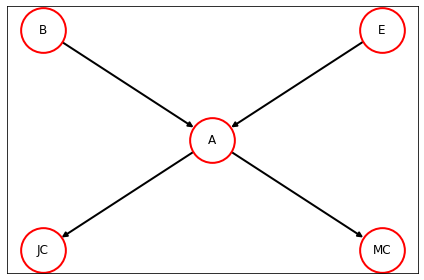

In [145]:
model = BayesianModel()
"""
Build the model adding nodes.
You can use `add_edges_from` function for this
"""
model.add_edge('B', 'A')
model.add_edge('E', 'A')
model.add_edge('A', 'JC')
model.add_edge('A', 'MC')

plot_graph(model, ax=plt.subplot(111))
plt.tight_layout()
plt.show()

In [212]:
# Factor Graphs

## Tom and Jerry

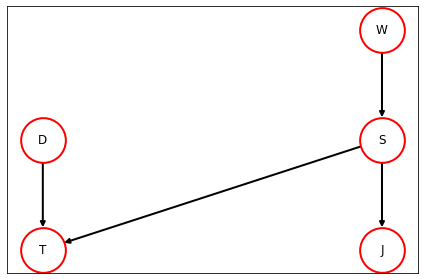

In [213]:
model = BayesianModel()
model.add_edges_from([('W', 'S'), ('S', 'T'), ('S', 'J'), ('D', 'T')])

W = TabularCPD(variable='W',
               variable_card=2,
               values=[[0.5], 
                       [0.5]],
               state_names={'W': [False, True]})
D = TabularCPD(variable='D',
               variable_card=2,
               values=[[0.4], 
                       [0.6]],
               state_names={'D': [False, True]})
S = TabularCPD(variable='S',
               variable_card=2,
               evidence=['W'],
               evidence_card=[2],
               values=[[0.9, 0.3], 
                       [0.1, 0.7]],
               state_names={
                   'S': [False, True],
                   'W': [False, True]
               })
J = TabularCPD(variable='J',
               variable_card=2,
               evidence=['S'],
               evidence_card=[2],
               values=[[0.9, 0.5], 
                       [0.1, 0.5]],
               state_names={
                   'J': [False, True],
                   'S': [False, True]
               })
T = TabularCPD(variable='T',
               variable_card=2,
               evidence=['D', 'S'],
               evidence_card=[2, 2],
               values=[[0.9, 0.5, 0.5, 0.1], 
                       [0.1, 0.5, 0.5, 0.9]],
               state_names={
                   'T': [False, True],
                   'D': [False, True],
                   'S': [False, True]
               })

model.add_cpds(W, D, S, J, T)

plot_graph(model, ax=plt.subplot(111))
plt.tight_layout()
plt.show()

In [214]:
belief_propagation = BeliefPropagation(model)

In [215]:
print(belief_propagation.query(variables=['S'], evidence={}))

  0%|          | 0/4 [00:00<?, ?it/s]

+----------+----------+
| S        |   phi(S) |
+==========+==========+
| S(False) |   0.6000 |
+----------+----------+
| S(True)  |   0.4000 |
+----------+----------+


In [216]:
print(belief_propagation.query(variables=['S'], evidence={'J': True}))

  0%|          | 0/3 [00:00<?, ?it/s]

+----------+----------+
| S        |   phi(S) |
+==========+==========+
| S(False) |   0.2308 |
+----------+----------+
| S(True)  |   0.7692 |
+----------+----------+


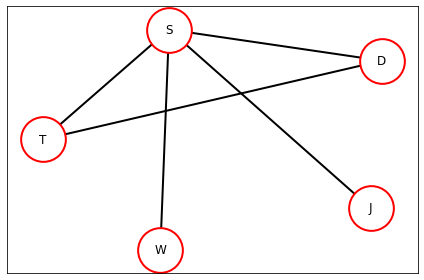

In [217]:
model = MarkovModel()
"""
Build the model adding nodes.
You can use `add_edges_from` function for this
"""
model.add_edges_from([('W', 'S'), ('S', 'T'), ('S', 'J'), ('D', 'T')])
"""
Add edges between the parents of the required nodes
Connect nodes that should be moralized
"""
model.add_edges_from([('D', 'S')])
"""
Define probabilities W (for Winter) and D (for Drunk) 
You can use numpy arrays for the definition
"""
W = np.array([0.5, 0.5])
D = np.array([0.6, 0.4])
"""
Define conditional probabilities 
WS (for Slick road given Winter), 
SJ (for Jerry having an accident given slick road), 
DST (for Tom having an accident given he is drunk and road is slick).
You can use numpy arrays for the definition
"""
# Note: WS has entries [P(S=True|W=True), P(S=False|W=True), P(S=True|W=False), P(S=False|W=False)]
# Note: DST has entries [P(T=True|D=True,S=True), P(T=False|D=True,S=True), P(T=True|D=True,S=False), ...
WS = np.array([0.7, 0.3, 0.1, 0.9])
SJ = np.array([0.5, 0.5, 0.1, 0.9])
DST = np.array([0.9, 0.1, 0.5, 0.5, 0.5, 0.5, 0.1, 0.9])
"""
Define the factors you considered
You can use the `DiscreteFactor` function and the defined probabilities for this
"""
factorA = DiscreteFactor(['W'], [2], W)
factorB = DiscreteFactor(['D'], [2], D)
factorC = DiscreteFactor(['W', 'S'], [2, 2], WS)
factorD = DiscreteFactor(['S', 'J'], [2, 2], SJ)
factorE = DiscreteFactor(['D', 'S', 'T'], [2, 2, 2], DST)
model.add_factors(factorA, factorB, factorC, factorD, factorE)

plot_graph(model, ax=plt.subplot(111), pos=nx.spring_layout(model))
plt.tight_layout()
plt.show()

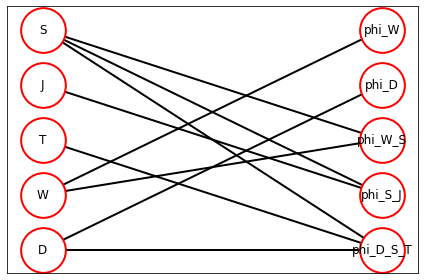

In [221]:
factor_graph = model.to_factor_graph()
top = nx.bipartite.sets(factor_graph)[0]
pos = nx.bipartite_layout(factor_graph, top)
plot_graph(factor_graph, ax=plt.subplot(111), pos=pos)
plt.tight_layout()
plt.show()